In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
#y_train stores all the labels of images 
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

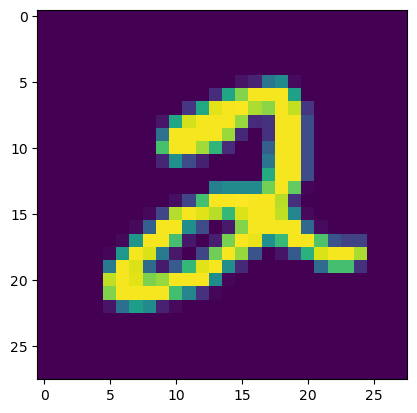

In [12]:
# plotting handwritten digits
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [19]:
#x_train[0]

In [20]:
x_train=x_train/255
x_test=x_test/255

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Implementing keras sequential model

In [56]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 30)                3870      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
Total params: 104660 (408.83 KB)
Trainable params: 104660 (408.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
#to compile the model and train

### Compilation

In [59]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics="accuracy")

### Model Training

In [60]:
data=model.fit(x_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2914 - accuracy: 0.9145 - val_loss: 0.1543 - val_accuracy: 0.9541
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1217 - accuracy: 0.9626 - val_loss: 0.1195 - val_accuracy: 0.9634
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.1023 - val_accuracy: 0.9680
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0632 - accuracy: 0.9808 - val_loss: 0.1074 - val_accuracy: 0.9678
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0895 - val_accuracy: 0.9747
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0880 - val_accuracy: 0.9735
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0905 - val_accuracy:

### Predict data

In [61]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [62]:
#selecting values with max probability as per y_prob
y_pred=y_prob.argmax(axis=1)

In [63]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [64]:
#testing the accuracy of prediction
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [65]:
accuracy

0.975

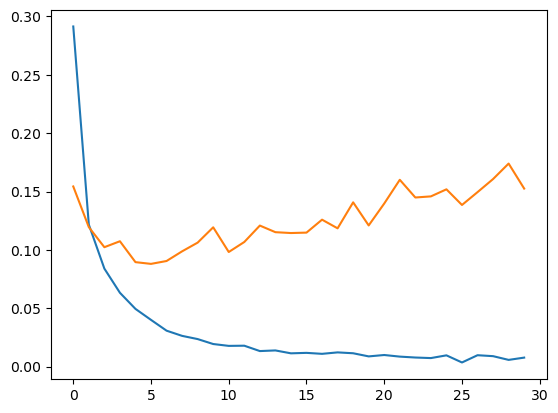

In [74]:
# plotting loss,validation_loss
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])

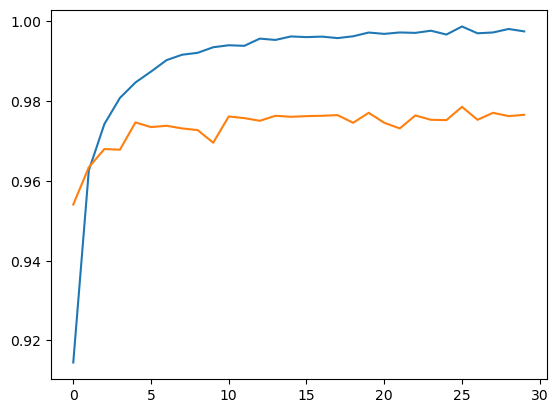

In [75]:
#plot accuracy
plt.plot(data.history['accuracy'])
plt.plot(data.history['val_accuracy'])

### testing our predictions using MNIST dataset 

#### Test 1

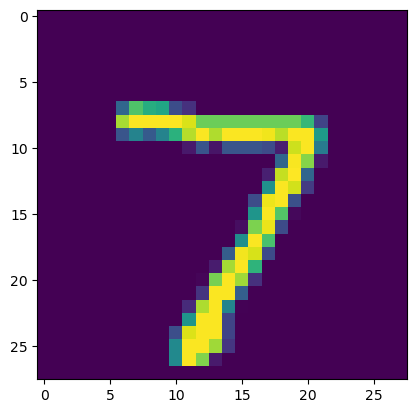

In [77]:
plt.imshow(x_test[0])

In [82]:
#model.predict(x_test[0].reshape(1,28,28))

In [80]:
value=model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 85ms/step


#### output

In [81]:
#predicted value by our model
print(value)

[7]


#### Test 2

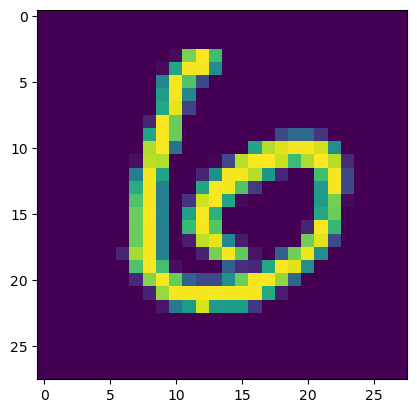

In [83]:
plt.imshow(x_test[11])

#### output

In [85]:
expected_value=model.predict(x_test[11].reshape(1,28,28)).argmax(axis=1)
print(expected_value)

1/1 [==============================] - 0s 84ms/step
[6]
